Lora_SUDA start


NameError: name 'drift_suda' is not defined

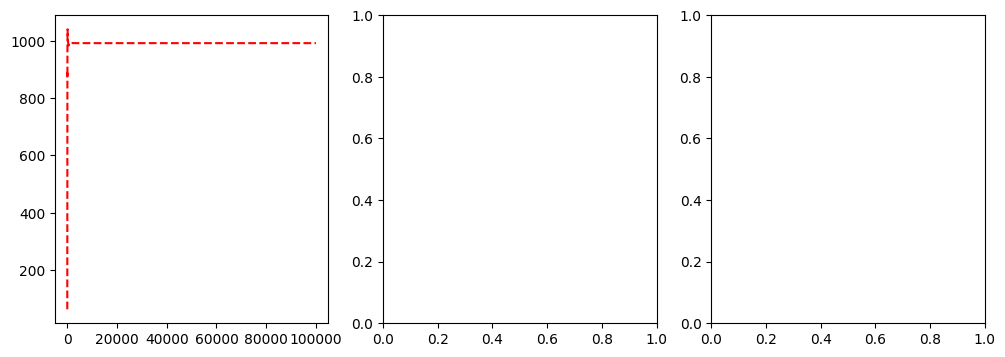

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression

#from topology import *

import networkx as nx
import matplotlib

import copy

import scipy.io as sio
from scipy.sparse import diags
from lora_GT import  *

np.random.seed(2035)

N = 100 # N is the network size, M is the local data dimension
M=50
r,m=10,2000#r is the rank of the subspace , m is the number of subspace
total_sample_size = N * 1000 # 8000 is the local data size at each node
X, y = genLS(N, M)
w_sol = solLS(X, y)
Ws = np.ones((N,1))@w_sol.T
I=np.eye(N)
P = generate_Stiefel_tensor(m,M,r)




# # exponential graph
A, incidence_matrix, Num_neighbor = PowerTwoRing(N)


alpha, maxite, epochs, noise = 0.2, 100000, 1, 0 # noise = 0 indicates the deterministic scenario


beta=1.0

# loss_csgd_sub,dist_csgd_sub,con_err_csgd_sub=lora_csgd (X,y,Ws,N,P,alpha,noise=noise,maxite=maxite,epochs=epochs)
# loss_simple_lora_gt,dist_simple_lora_gt,con_err_simple_lora_gt,drift_simple_lora_gt=lora_GT(X,y,Ws,N,A,P,alpha,noise=noise,maxite=maxite,epochs=epochs,next_tracking=False)
# loss_next_tracking,dist_next_tracking,con_err_next_tracking,drift_next_tracking=lora_GT(X,y,Ws,N,A,P,alpha,noise=noise,maxite=maxite,epochs=epochs,next_tracking=True)
# loss_suda,dist_suda,con_err_suda,drift_suda=suda(X, y, Ws, N, beta, A@A, I-A, I, alpha, noise=noise,maxite=maxite,epochs=epochs)
loss_suda_lora,dist_suda_lora,con_err_suda_lora,drift_suda_lora=lora_suda(X, y, Ws, N, beta, A@A, I-A, I, P,alpha, noise=noise,maxite=maxite,epochs=epochs)



# loss_record_dsgd,dist_record_dsgd,con_err_record_dsgd=dsgd_stochastic(X, y, Ws, N, A, alpha, noise=noise,maxite=maxite,epochs=epochs)
# loss_record_csgd,dist_record_csgd,con_err_record_csgd=csgd_stochastic(X, y, Ws, N, A, alpha, noise=noise,maxite=maxite,epochs=epochs)

fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 


 
axs[0].plot(drift_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
axs[0].plot(drift_suda, color='blue', linestyle='-', label='SUDA(GT)')
axs[0].plot(drift_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
axs[0].plot(drift_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
axs[0].set_title('Total Drift Comparison')
axs[0].set_xlabel('Iteration')
axs[0].grid(True)
axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(con_err_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
axs[1].plot(con_err_suda, color='blue', linestyle='-', label='SUDA(GT)')
axs[1].plot(con_err_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
axs[1].plot(con_err_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')


axs[1].set_title('Consensus Error Comparison')
axs[1].set_xlabel('Iteration')
axs[1].grid(True)
axs[1].set_yscale('log')
axs[1].legend()

axs[2].plot(dist_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
axs[2].plot(dist_suda, color='blue', linestyle='-', label='SUDA(GT)')
axs[2].plot(dist_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
axs[2].plot(dist_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
axs[2].plot(dist_csgd_sub, color='orange', linestyle='-', label='Subspace CSGD')


axs[2].set_title('Distance Comparison')
axs[2].set_xlabel('Iteration')
axs[2].grid(True)
axs[2].set_yscale('log')
axs[2].legend()
plt.tight_layout()
#plt.savefig('comparison.pdf',dpi=300)
plt.show()

Lora_SUDA start


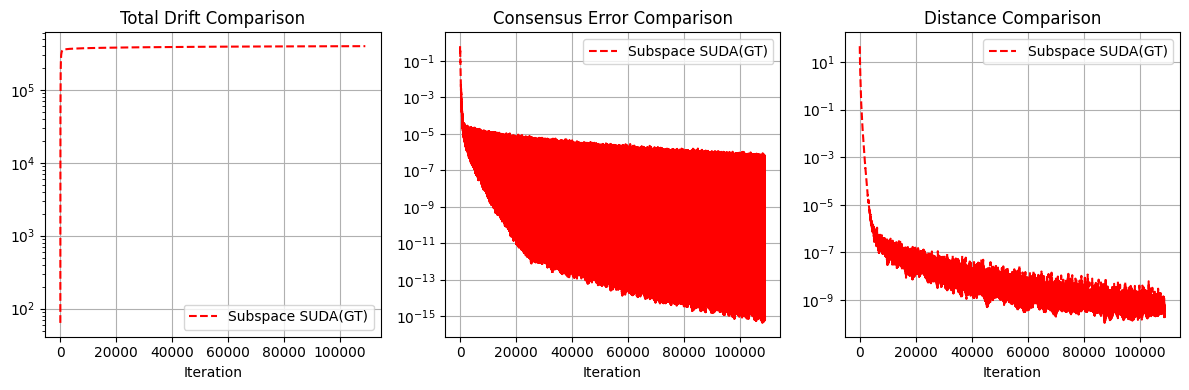

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression

#from topology import *

import networkx as nx
import matplotlib

import copy

import scipy.io as sio
from scipy.sparse import diags
from lora_GT import  *

np.random.seed(2035)

N = 100 # N is the network size, M is the local data dimension
M=50
r,m=10,2000#r is the rank of the subspace , m is the number of subspace
total_sample_size = N * 1000 # 8000 is the local data size at each node
X, y = genLS(N, M)
w_sol = solLS(X, y)
Ws = np.ones((N,1))@w_sol.T
I=np.eye(N)
P = generate_Stiefel_tensor(m,M,r)




# # exponential graph
A, incidence_matrix, Num_neighbor = PowerTwoRing(N)


alpha,  epochs, noise = 0.2,  1, 0 # noise = 0 indicates the deterministic scenario


beta=1.0
decay=0.001
def iter_P(i):
    i=(1+1e-2*i)*5
    return int(i)
loss_suda_lora,dist_suda_lora,con_err_suda_lora,drift_suda_lora=lora_suda(X, y, Ws, N, beta, A@A, I-A, I, P,alpha,iter_P,decay=decay, noise=noise,epochs=epochs)


#loss_suda,dist_suda,con_err_suda,drift_suda=suda(X, y, Ws, N, beta, A@A, I-A, I, alpha, noise=noise,maxite=maxite,epochs=epochs)



fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 


 
axs[0].plot(drift_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
# axs[0].plot(drift_suda, color='blue', linestyle='-', label='SUDA(GT)')
# axs[0].plot(drift_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
# axs[0].plot(drift_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
axs[0].set_title('Total Drift Comparison')
axs[0].set_xlabel('Iteration')
axs[0].grid(True)
axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(con_err_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
# axs[1].plot(con_err_suda, color='blue', linestyle='-', label='SUDA(GT)')
# axs[1].plot(con_err_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
# axs[1].plot(con_err_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')


axs[1].set_title('Consensus Error Comparison')
axs[1].set_xlabel('Iteration')
axs[1].grid(True)
axs[1].set_yscale('log')
axs[1].legend()

axs[2].plot(dist_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
# axs[2].plot(dist_suda, color='blue', linestyle='-', label='SUDA(GT)')
# axs[2].plot(dist_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
# axs[2].plot(dist_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
# axs[2].plot(dist_csgd_sub, color='orange', linestyle='-', label='Subspace CSGD')


axs[2].set_title('Distance Comparison')
axs[2].set_xlabel('Iteration')
axs[2].grid(True)
axs[2].set_yscale('log')
axs[2].legend()
plt.tight_layout()
#plt.savefig('comparison.pdf',dpi=300)
plt.show()

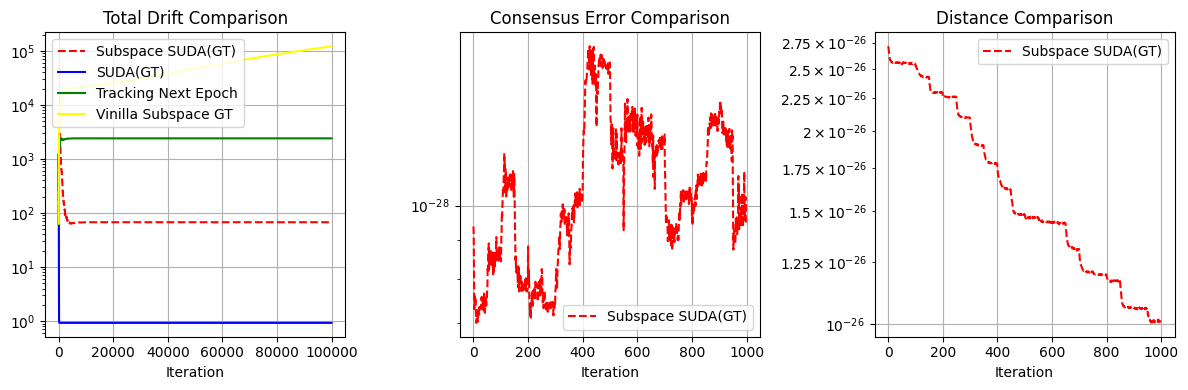

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 


 
axs[0].plot(drift_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
axs[0].plot(drift_suda, color='blue', linestyle='-', label='SUDA(GT)')
axs[0].plot(drift_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
axs[0].plot(drift_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
axs[0].set_title('Total Drift Comparison')
axs[0].set_xlabel('Iteration')
axs[0].grid(True)
axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(con_err_suda_lora[50000:51000], color='red', linestyle='--', label='Subspace SUDA(GT)')
#axs[1].plot(con_err_suda, color='blue', linestyle='-', label='SUDA(GT)')
#axs[1].plot(con_err_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
#axs[1].plot(con_err_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')


axs[1].set_title('Consensus Error Comparison')
axs[1].set_xlabel('Iteration')
axs[1].grid(True)
axs[1].set_yscale('log')
axs[1].legend()

axs[2].plot(dist_suda_lora[50000:51000], color='red', linestyle='--', label='Subspace SUDA(GT)')
# axs[2].plot(dist_suda, color='blue', linestyle='-', label='SUDA(GT)')
# axs[2].plot(dist_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
# axs[2].plot(dist_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
# axs[2].plot(dist_csgd_sub, color='orange', linestyle='-', label='Subspace CSGD')


axs[2].set_title('Distance Comparison')
axs[2].set_xlabel('Iteration')
axs[2].grid(True)
axs[2].set_yscale('log')
axs[2].legend()
plt.tight_layout()
#plt.savefig('comparison.pdf',dpi=300)
plt.show()
#2000个子空间

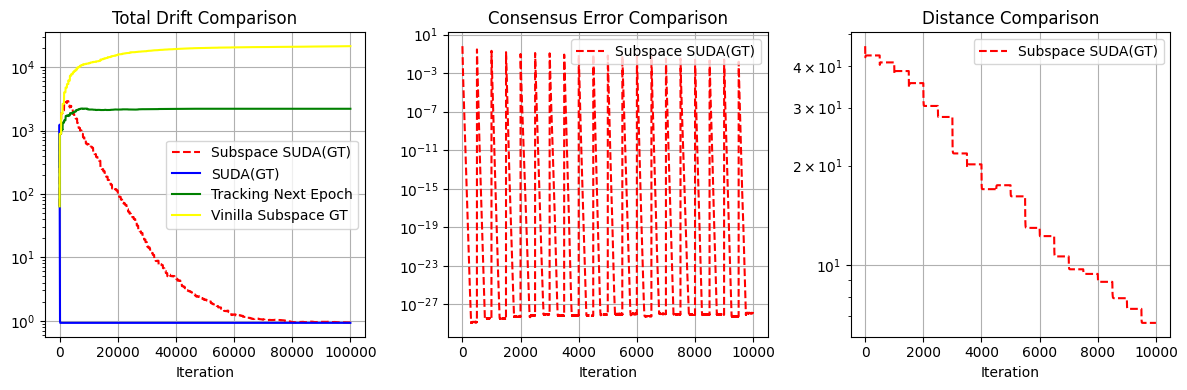

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 


 
axs[0].plot(drift_suda_lora, color='red', linestyle='--', label='Subspace SUDA(GT)')
axs[0].plot(drift_suda, color='blue', linestyle='-', label='SUDA(GT)')
axs[0].plot(drift_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
axs[0].plot(drift_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
axs[0].set_title('Total Drift Comparison')
axs[0].set_xlabel('Iteration')
axs[0].grid(True)
axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(con_err_suda_lora[0:10000], color='red', linestyle='--', label='Subspace SUDA(GT)')
#axs[1].plot(con_err_suda, color='blue', linestyle='-', label='SUDA(GT)')
#axs[1].plot(con_err_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
#axs[1].plot(con_err_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')


axs[1].set_title('Consensus Error Comparison')
axs[1].set_xlabel('Iteration')
axs[1].grid(True)
axs[1].set_yscale('log')
axs[1].legend()

axs[2].plot(dist_suda_lora[0:10000], color='red', linestyle='--', label='Subspace SUDA(GT)')
# axs[2].plot(dist_suda, color='blue', linestyle='-', label='SUDA(GT)')
# axs[2].plot(dist_next_tracking, color='green', linestyle='-', label='Tracking Next Epoch')
# axs[2].plot(dist_simple_lora_gt, color='yellow', linestyle='-', label='Vinilla Subspace GT')
# axs[2].plot(dist_csgd_sub, color='orange', linestyle='-', label='Subspace CSGD')


axs[2].set_title('Distance Comparison')
axs[2].set_xlabel('Iteration')
axs[2].grid(True)
axs[2].set_yscale('log')
axs[2].legend()
plt.tight_layout()
#plt.savefig('comparison.pdf',dpi=300)
plt.show()
#200个子空间

In [7]:
0.9995**2000

0.367787452146011